# PyDarshan Data Layout and Understanding
This notebook walks through the pydarshan data structure to
help understand how to access data in order to build analysis.

### Minimum Python Version
- 3.6 is the minimum version

In [1]:
import platform
print(platform.python_version())

3.8.5


#### Import darshan
- If this fails with a traceback, it is most likely due to not finding the corresponding libdarshan-util.so library
- export LD_LIBRARY_PATH=<path/to/darshan/lib> before running the notebook

In [2]:
import darshan

### Example log
- we load an example log to walk through the data structures

In [3]:
logfile="examples/shane_macsio_id29959_5-22-32552-7035573431850780836_1590156158.darshan"
report = darshan.DarshanReport(logfile, read_all=True)

 Skipping. Log does not contain data for mod: LUSTRE


### DarshanReport object
- This object contains many methods for loading and processing logs
- default is to load all known log entries into the default data set
  - can instead disable loading and load ony logs from modules you are interested in

In [4]:
dir(report)

['__add__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_counters',
 '_metadata',
 '_modules',
 '_mounts',
 'automatic_summary',
 'converted_records',
 'counters',
 'data',
 'data_revision',
 'dtype',
 'end_time',
 'filename',
 'info',
 'log',
 'lookup_name_records',
 'metadata',
 'mod_read_all_apmpi_records',
 'mod_read_all_apxc_records',
 'mod_read_all_dxt_records',
 'mod_read_all_lustre_records',
 'mod_read_all_records',
 'mod_records',
 'modules',
 'mounts',
 'name_records',
 'open',
 'provenance_enabled',
 'provenance_graph',
 'provenance_reports',
 'read_all',
 'read_all_dxt_records',
 'read_all_generic_records',
 'read_metadata',
 'rebase_t

### Log metadata summary
- The info() method prints an overview of the log to standard out
- useful for understanding what is in the log
- Loaded Records shows which modules are present and how many records are in each
- Name records indicates how many different "files" are in the log
  - some name records are special like <STDOUT> that don't refer to an actual file

In [5]:
report.info()

Filename:       examples/shane_macsio_id29959_5-22-32552-7035573431850780836_1590156158.darshan
Times:          2020-05-22 14:02:32 to 2020-05-22 14:02:35 (Duration 0:00:03)
Executeable:    /home/shane/software/spack/opt/spack/linux-ubuntu19.10-skylake/gcc-9.2.1/macsio-1.1-uirjqckqkkiv7ns5sr5siyraklgp5pma/macsio --interface hdf5 --parallel_file_mode SIF 1 --part_dim 3 --part_size 200K --num_dumps 1 --vars_per_part 1 --avg_num_parts 4.5
Processes:      16
JobID:          29959
UID:            1000
Modules in Log: ['POSIX', 'MPI-IO', 'H5F', 'H5D']
Loaded Records: {'POSIX': 3, 'MPI-IO': 1, 'H5F': 1, 'H5D': 1}
Name Records:   4
Darshan/Hints:  {'lib_ver': '3.2.1', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(139645897281440) (tmp)


In [6]:
import pprint

### Name Records
- this is a list of all the files the darshan log knows about
- Some "files" may not be actual files and are place holders for their records, such as <STDOUT> or an HDF5 dataset
- The key is a hash which can be used to correlate the file in the different modules
  - for example, using MPI-IO to write a file, and MPI-IO then uses POSIX will have records
    in both the POSIX and MPI-IO modules.

In [7]:
pprint.pprint(report.name_records)

{326674217917622578: '/tmp/test/macsio-timings.log',
 8409215679985794245: '/tmp/test/macsio_hdf5_000.h5',
 9271460256448564466: '/tmp/test/macsio_hdf5_000.h5:/constant',
 12580831639222665179: '/tmp/test/macsio-log.log'}


### Mount File systems
- the Mounts variable is a list of mount point names and file system types
- the list is sorted from longest path to shortest path
  - in order to determine which file system a file is on, match the path of the name record
    with the longest matching mount
  - note this can be incorrect if symlinking a file in one files system to another

In [8]:
pprint.pprint(report.mounts)

[('/run/snapd/ns/gnome-calculator.mnt', 'nsfs'),
 ('/snap/gnome-system-monitor/135', 'squashfs'),
 ('/snap/gnome-system-monitor/145', 'squashfs'),
 ('/snap/gtk-common-themes/1506', 'squashfs'),
 ('/snap/gtk-common-themes/1502', 'squashfs'),
 ('/snap/gnome-characters/495', 'squashfs'),
 ('/snap/gnome-calculator/730', 'squashfs'),
 ('/run/snapd/ns/chromium.mnt', 'nsfs'),
 ('/snap/gnome-calculator/748', 'squashfs'),
 ('/snap/gnome-characters/539', 'squashfs'),
 ('/sys/firmware/efi/efivars', 'efivarfs'),
 ('/snap/gnome-3-28-1804/110', 'squashfs'),
 ('/snap/gnome-3-28-1804/116', 'squashfs'),
 ('/proc/sys/fs/binfmt_misc', 'autofs'),
 ('/snap/gnome-3-26-1604/97', 'squashfs'),
 ('/snap/gnome-3-26-1604/98', 'squashfs'),
 ('/snap/gnome-3-34-1804/27', 'squashfs'),
 ('/snap/gnome-3-34-1804/33', 'squashfs'),
 ('/sys/fs/cgroup/unified', 'cgroup2'),
 ('/snap/gnome-logs/100', 'squashfs'),
 ('/snap/gnome-logs/93', 'squashfs'),
 ('/run/user/1000/gvfs', 'fuse.gvfsd-fuse'),
 ('/snap/chromium/1135', 'squas

### Records
- this is where the data of the log is held, this is where you start for analysis
- records is a dictionary with each key being a module that contains a DarshanRecordCollection object

In [9]:
pprint.pprint(report.records)

{'H5D': <darshan.report.DarshanRecordCollection object at 0x7f01da918b20>,
 'H5F': <darshan.report.DarshanRecordCollection object at 0x7f01da902c10>,
 'MPI-IO': <darshan.report.DarshanRecordCollection object at 0x7f01da902e80>,
 'POSIX': <darshan.report.DarshanRecordCollection object at 0x7f01da902b20>}


### DarshanRecordCollection
- this object is derived from collections.abc.MutableSequence
- you can access each records like a sequence, [0], [1:3], etc..
- it also has 3 functions that return the data in different formats (depending on your preference)
- to_df() -> provides counters as pandas data frames
- to_dict() -> provides counters as python dictionaries
- to_numpy() -> provides counters as numpy arrays (this is the default representation)
  - these 3 methods will be deepcopies of data if transforming from the loaded representation

In [10]:
dir(report.records['POSIX'])

['__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_records',
 '_type',
 'append',
 'clear',
 'count',
 'end_time',
 'extend',
 'id',
 'index',
 'info',
 'insert',
 'mod',
 'pop',
 'rank',
 'remove',
 'report',
 'reverse',
 'start_time',
 'timebase',
 'to_df',
 'to_dict',
 'to_json',
 'to_list',
 'to_numpy']

### Accessing DarshanRecordCollection objects
- You can check the len() for the number of records in the object
- Accessing the object like a sequence will return a dictionary-like reference that allows access to four
  pieces of data
  - id -> the hash which corresponds to the hash in the name_records
  - rank -> the rank the data was collected on or -1 if the file was accessed by all ranks and data was reduced to 
    single record
  - counters -> all integer counters
  - fcounters -> all floating point counters
- the representation of data within _counters_ and _fcounters_ defaults to numpy arrays but depends
  on what _dtype_ was set when the records were loaded

In [11]:
print("num records = ", len(report.records['POSIX']))
print(type(report.records['POSIX'][0]))
pprint.pprint(report.records['POSIX'][0])

num records =  3
<class 'darshan.report.DarshanRecordCollection'>
{'id': 326674217917622578, 'rank': -1, 'counters': array([   17,     0,     0,     0,    51,     0,     0,    -1,     0,
           0,     0,     0,     0,     0,     0, 12460,     0,  6229,
           0,    18,     0,    34,     0,     0,     8,    50,  4096,
           0,   890,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,    51,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,   178,   356,   890,     0,    35,    15,
           1,     0,     2,   356,     0,  7120]), 'fcounters': array([3.14636612e+00, 0.00000000e+00, 3.14642453e+00, 3.14647627e+00,
       3.22398162e+00, 0.00000000e+00, 3.22401357e+00, 3.22401595e+00,
       0.00000000e+00, 1.58786774e-04, 2.01463699e-04, 0.00000000e+00,
       1.16825104e-05, 9.05990601e-06, 1.33752823e-04, 8.42000025e-10,
       2.68076344e+06])}


### Numpy Format
- the default format
- use to_numpy() to get a deep copy of the data in this format
- returns a list of dictionaries, one dictionary for each record
- dictionary is the same format as the DarshanRecordCollection above
- _counters_ and _fcounters_ contain the numpy array
- this is format assumed by some of the experimental aggregators that are part of the library

In [12]:
np = report.records['POSIX'].to_numpy()
pprint.pprint(np)

[{'counters': array([   17,     0,     0,     0,    51,     0,     0,    -1,     0,
           0,     0,     0,     0,     0,     0, 12460,     0,  6229,
           0,    18,     0,    34,     0,     0,     8,    50,  4096,
           0,   890,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,    51,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,   178,   356,   890,     0,    35,    15,
           1,     0,     2,   356,     0,  7120]),
  'fcounters': array([3.14636612e+00, 0.00000000e+00, 3.14642453e+00, 3.14647627e+00,
       3.22398162e+00, 0.00000000e+00, 3.22401357e+00, 3.22401595e+00,
       0.00000000e+00, 1.58786774e-04, 2.01463699e-04, 0.00000000e+00,
       1.16825104e-05, 9.05990601e-06, 1.33752823e-04, 8.42000025e-10,
       2.68076344e+06]),
  'id': 326674217917622578,
  'rank': -1},
 {'counters': array([      17,        0,        0,        6,     7699,        

To access a specific counters, you can generate a mapping of counters names to indexs

In [13]:
counter2index = dict(zip(report.counters['POSIX']['counters'],
                         range(0, len(report.counters['POSIX']['counters']))))
fcounter2index = dict(zip(report.counters['POSIX']['fcounters'],
                         range(0, len(report.counters['POSIX']['fcounters']))))
i = counter2index['POSIX_READS']
print(np[0]['counters'][i])
i = fcounter2index['POSIX_F_READ_TIME']
print(np[0]['fcounters'][i])

0
0.0


### Dictionary Format
- use to_dict() to get a deep copy of the data in this format
- returns a list of dictionaries, one dictionary for each record
- dictionary is the same format as the DarshanRecordCollection above
- _counters_ and _fcounters_ contain the dictionary
  - counters names are the keys and the value is the counter value

In [14]:
d = report.records['POSIX'].to_dict()
pprint.pprint(d)

[{'counters': {'POSIX_ACCESS1_ACCESS': 178,
               'POSIX_ACCESS1_COUNT': 35,
               'POSIX_ACCESS2_ACCESS': 356,
               'POSIX_ACCESS2_COUNT': 15,
               'POSIX_ACCESS3_ACCESS': 890,
               'POSIX_ACCESS3_COUNT': 1,
               'POSIX_ACCESS4_ACCESS': 0,
               'POSIX_ACCESS4_COUNT': 0,
               'POSIX_BYTES_READ': 0,
               'POSIX_BYTES_WRITTEN': 12460,
               'POSIX_CONSEC_READS': 0,
               'POSIX_CONSEC_WRITES': 18,
               'POSIX_DUPS': 0,
               'POSIX_FASTEST_RANK': 2,
               'POSIX_FASTEST_RANK_BYTES': 356,
               'POSIX_FDSYNCS': 0,
               'POSIX_FILENOS': 0,
               'POSIX_FILE_ALIGNMENT': 4096,
               'POSIX_FILE_NOT_ALIGNED': 50,
               'POSIX_FSYNCS': 0,
               'POSIX_MAX_BYTE_READ': 0,
               'POSIX_MAX_BYTE_WRITTEN': 6229,
               'POSIX_MAX_READ_TIME_SIZE': 0,
               'POSIX_MAX_WRITE_TIME_SIZE': 890

To access a specific counters, just use the counter name corresponding to integer or floating point counter

In [15]:
print(d[0]['counters']['POSIX_READS'])
print(d[0]['fcounters']['POSIX_F_READ_TIME'])

0
0.0


### Pandas DataFrame Format
- use to_df() to get a deep copy of the data in this format
- returns a dictionary with _counters_ and _fcounters_ members
- _counters_ and _fcounters_ contain dataframes with all records
  - counters names are the columns and the records are the rows
  - _id_ and _rank_ are columns in the data frame

In [16]:
df = report.records['POSIX'].to_df()
pprint.pprint(df)

{'counters':    rank                    id  POSIX_OPENS  POSIX_FILENOS  POSIX_DUPS  \
0    -1    326674217917622578           17              0           0   
1    -1   8409215679985794245           17              0           0   
2    -1  12580831639222665179           17              0           0   

   POSIX_READS  POSIX_WRITES  POSIX_SEEKS  POSIX_STATS  POSIX_MMAPS  ...  \
0            0            51            0            0           -1  ...   
1            6          7699            4           32           -1  ...   
2            0            66            0            0           -1  ...   

   POSIX_ACCESS3_ACCESS  POSIX_ACCESS4_ACCESS  POSIX_ACCESS1_COUNT  \
0                   890                     0                   35   
1              13284480                    96                 7688   
2                 16384                     0                   50   

   POSIX_ACCESS2_COUNT  POSIX_ACCESS3_COUNT  POSIX_ACCESS4_COUNT  \
0                   15                  

To access a specific counters, use the counter name for the column and use either the absolute index
or the combination of rank and id.

In [17]:
pdf = df['counters']
# with index
print(pdf.loc[0]['POSIX_READS'])
pdf = df['fcounters']
# with rank,id
rank = pdf.loc[0]['rank']
id = pdf.loc[0]['id']
print(pdf.query("rank == {rank} and id == {id}".format(rank=rank,id=id))['POSIX_F_READ_TIME'][0])

0.0
0.0


The _counters_ and _fcounters_ can be merged into a single data set since all the column names are unique.

In [18]:
import pandas
posix_df = pandas.merge(df['counters'], df['fcounters'], left_on=['id','rank'], right_on=['id','rank'])
print(posix_df)

   rank                    id  POSIX_OPENS  POSIX_FILENOS  POSIX_DUPS  \
0    -1    326674217917622578           17              0           0   
1    -1   8409215679985794245           17              0           0   
2    -1  12580831639222665179           17              0           0   

   POSIX_READS  POSIX_WRITES  POSIX_SEEKS  POSIX_STATS  POSIX_MMAPS  ...  \
0            0            51            0            0           -1  ...   
1            6          7699            4           32           -1  ...   
2            0            66            0            0           -1  ...   

   POSIX_F_CLOSE_END_TIMESTAMP  POSIX_F_READ_TIME  POSIX_F_WRITE_TIME  \
0                     3.224016           0.000000            0.000159   
1                     2.939999           0.009038            0.122671   
2                     3.242320           0.000000            0.000382   

   POSIX_F_META_TIME  POSIX_F_MAX_READ_TIME  POSIX_F_MAX_WRITE_TIME  \
0           0.000201               0.0

## Basic Plotting using Pandas
- You can make quick plots with pandas in many cases
- in some cases, pandas plotting expects the data with a different organization which may make them difficult to use

<AxesSubplot:title={'center':'POSIX I/O Operation Counts per File'}, xlabel='id', ylabel='Operation Count'>

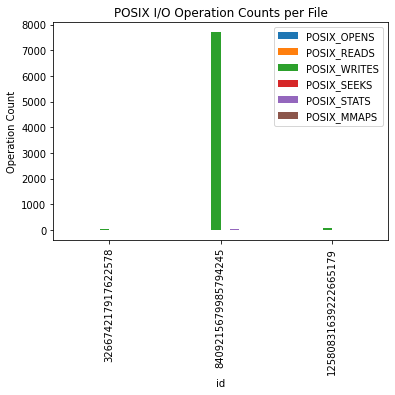

In [19]:
posix_ops=["POSIX_OPENS", "POSIX_READS", "POSIX_WRITES", "POSIX_SEEKS", "POSIX_STATS", "POSIX_MMAPS"]
posix_df.plot(kind='bar', x='id', y=posix_ops,
              title='POSIX I/O Operation Counts per File', ylabel='Operation Count')

## Counter Names
- The code below will print out all the counter names that are defined by each module
- counter names match the names defined in the C code as well as the darshan-parser output

In [20]:
for key in report.counters.keys():
    print("{1} Counters for {0} {1}".format(key, '*'*10))
    for counter in report.counters[key].keys():
        pprint.pprint(report.counters[key][counter])

********** Counters for POSIX **********
['POSIX_OPENS',
 'POSIX_FILENOS',
 'POSIX_DUPS',
 'POSIX_READS',
 'POSIX_WRITES',
 'POSIX_SEEKS',
 'POSIX_STATS',
 'POSIX_MMAPS',
 'POSIX_FSYNCS',
 'POSIX_FDSYNCS',
 'POSIX_RENAME_SOURCES',
 'POSIX_RENAME_TARGETS',
 'POSIX_RENAMED_FROM',
 'POSIX_MODE',
 'POSIX_BYTES_READ',
 'POSIX_BYTES_WRITTEN',
 'POSIX_MAX_BYTE_READ',
 'POSIX_MAX_BYTE_WRITTEN',
 'POSIX_CONSEC_READS',
 'POSIX_CONSEC_WRITES',
 'POSIX_SEQ_READS',
 'POSIX_SEQ_WRITES',
 'POSIX_RW_SWITCHES',
 'POSIX_MEM_NOT_ALIGNED',
 'POSIX_MEM_ALIGNMENT',
 'POSIX_FILE_NOT_ALIGNED',
 'POSIX_FILE_ALIGNMENT',
 'POSIX_MAX_READ_TIME_SIZE',
 'POSIX_MAX_WRITE_TIME_SIZE',
 'POSIX_SIZE_READ_0_100',
 'POSIX_SIZE_READ_100_1K',
 'POSIX_SIZE_READ_1K_10K',
 'POSIX_SIZE_READ_10K_100K',
 'POSIX_SIZE_READ_100K_1M',
 'POSIX_SIZE_READ_1M_4M',
 'POSIX_SIZE_READ_4M_10M',
 'POSIX_SIZE_READ_10M_100M',
 'POSIX_SIZE_READ_100M_1G',
 'POSIX_SIZE_READ_1G_PLUS',
 'POSIX_SIZE_WRITE_0_100',
 'POSIX_SIZE_WRITE_100_1K',
 'POSIX_S